# Bitcoin and Ethereum Price Analysis

### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import data

In [ ]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)
ethereum = pd.read_csv('ETH-EUR.csv', index_col='Date', parse_dates=True)

### Data Preprocessing and Visualization

In [ ]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


<AxesSubplot: xlabel='Date'>

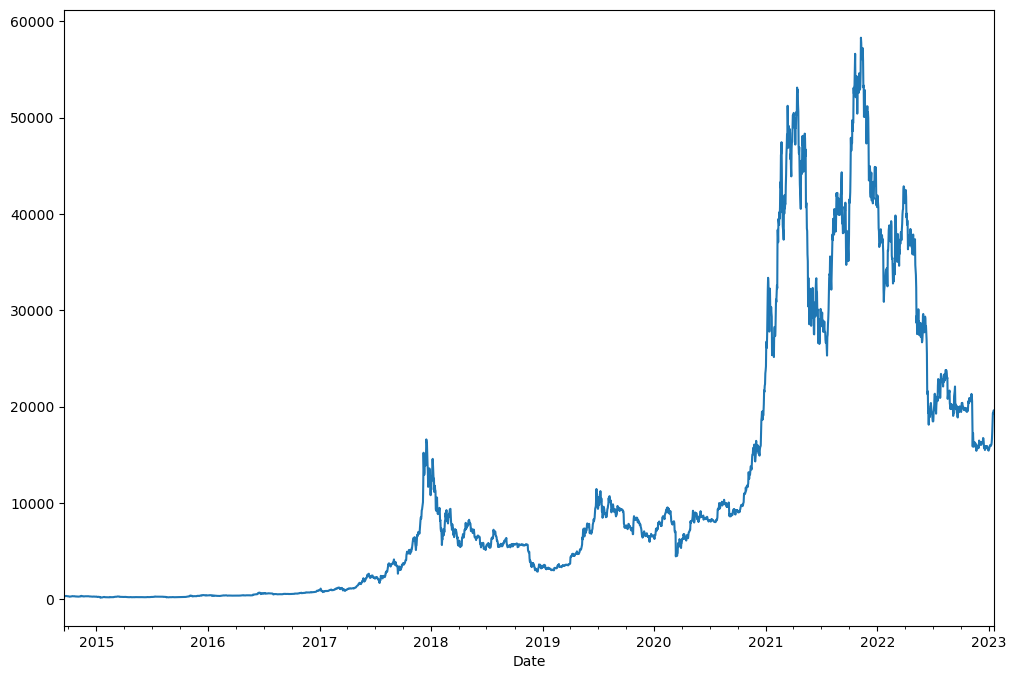

In [ ]:
bitcoin['Close'].plot(figsize=(12,8))

In [ ]:
bitcoin.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18'],
              dtype='datetime64[ns]', name='Date', length=3046, freq=None)

Text(0, 0.5, 'Price')

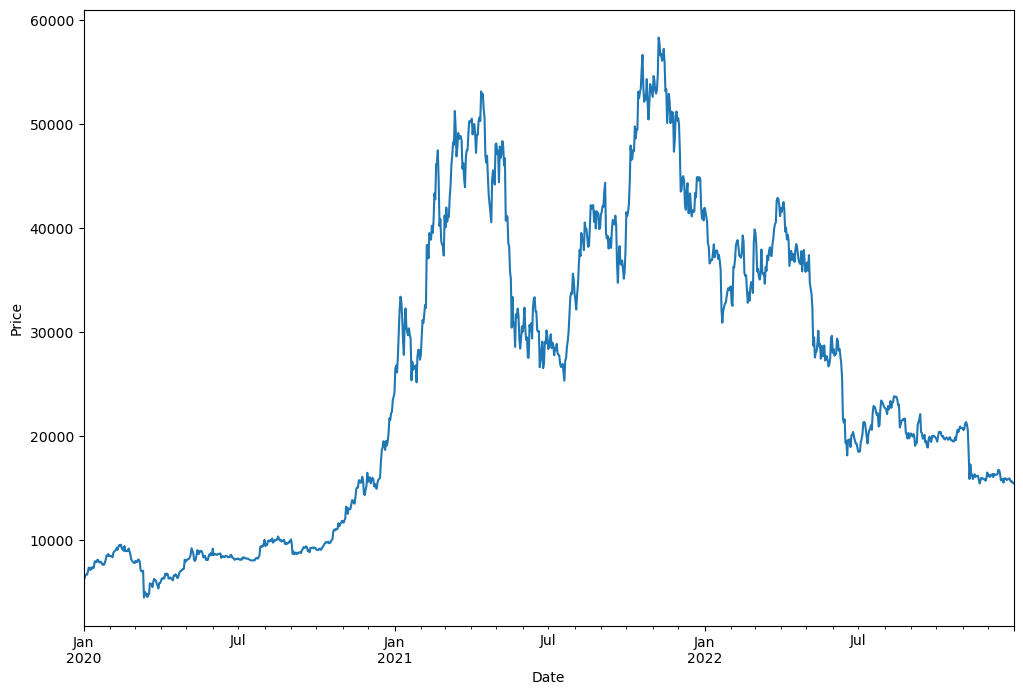

In [ ]:
bitcoin.loc['2020':'2022']['Close'].plot(figsize=(12,8))
plt.xlabel('Date')
plt.ylabel('Price')

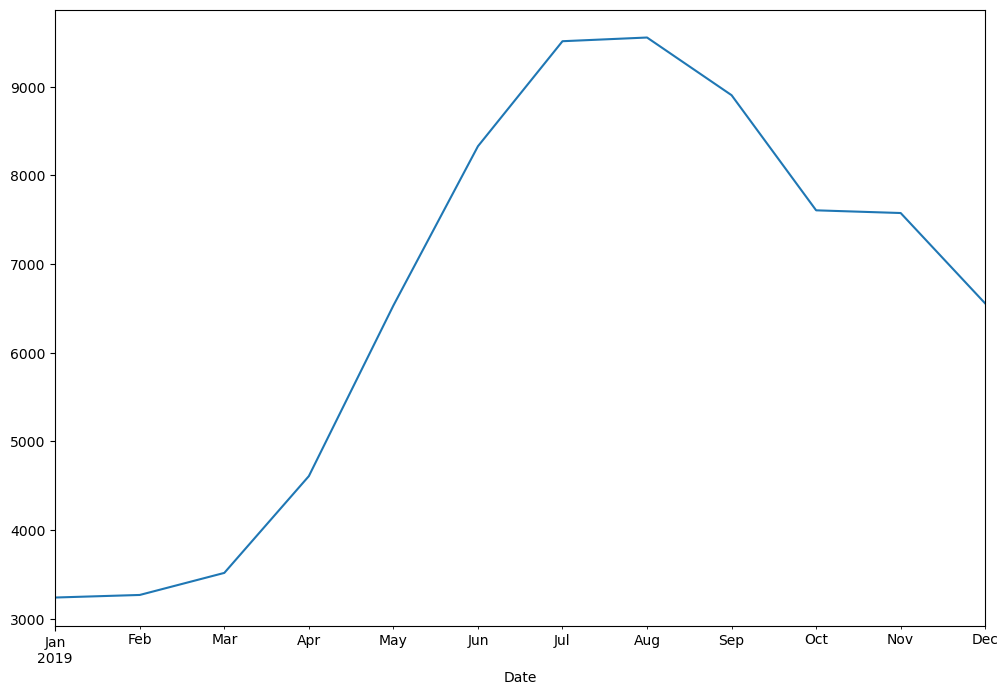

In [ ]:
bitcoin.loc['2019']['Close'].resample('M').mean().plot(figsize=(12,8))
plt.show()

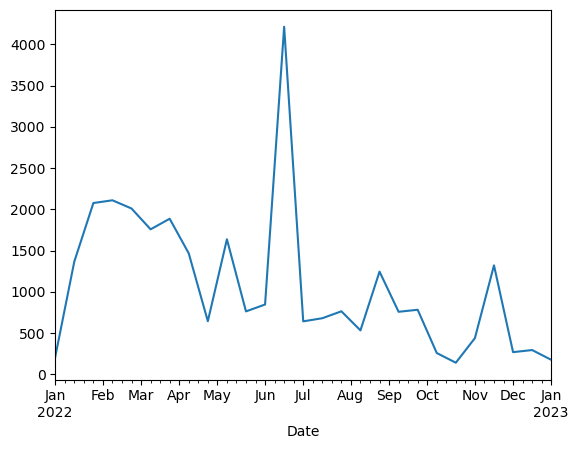

In [ ]:
bitcoin.loc['2022','Close'].resample('2W').std().plot()
plt.show()

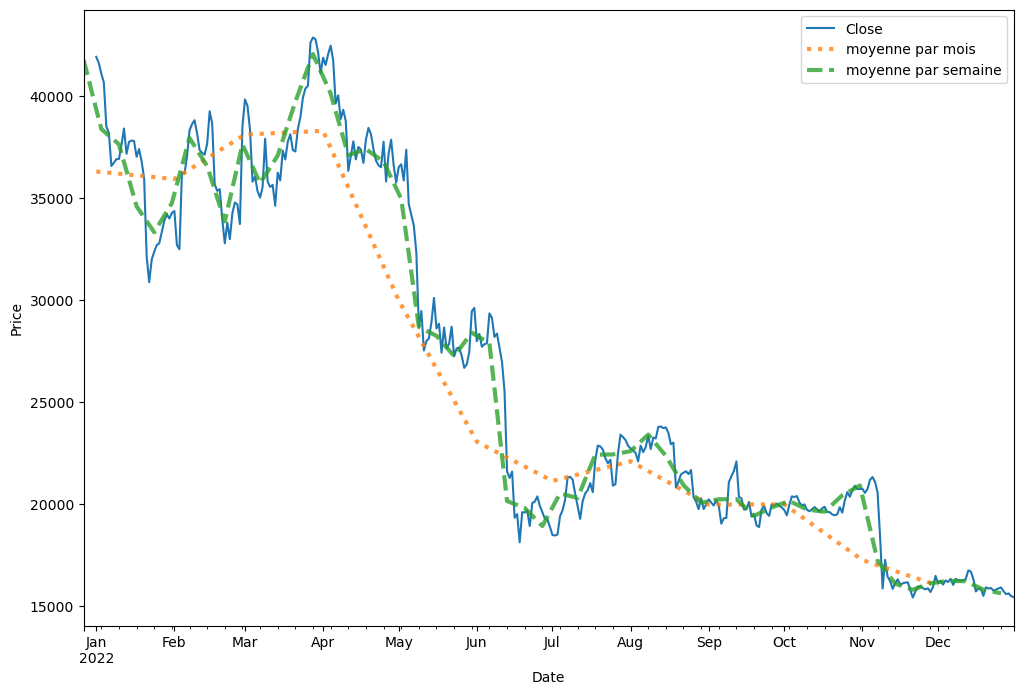

In [ ]:
plt.figure(figsize=(12,8))
bitcoin.loc['2022','Close'].plot()
bitcoin.loc['2022','Close'].resample('M').mean().plot(label='moyenne par mois', lw=3,ls=':',alpha=0.8)
bitcoin.loc['2022','Close'].resample('W').mean().plot(label='moyenne par semaine', lw=3,ls='--',alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show();

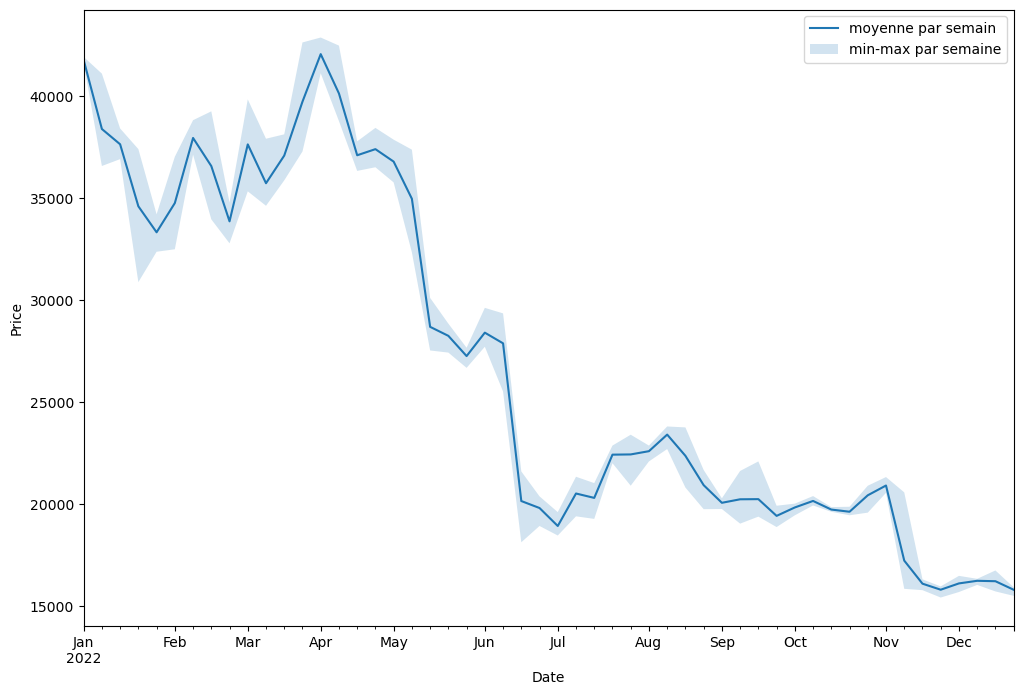

In [ ]:
m = bitcoin.loc['2022','Close'].resample('W').agg(['mean','std','min','max'])

plt.figure(figsize=(12,8))
m['mean']['2022'].plot(label='moyenne par semain')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine') #calcul de l'incertitude [min ; max]

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

[]

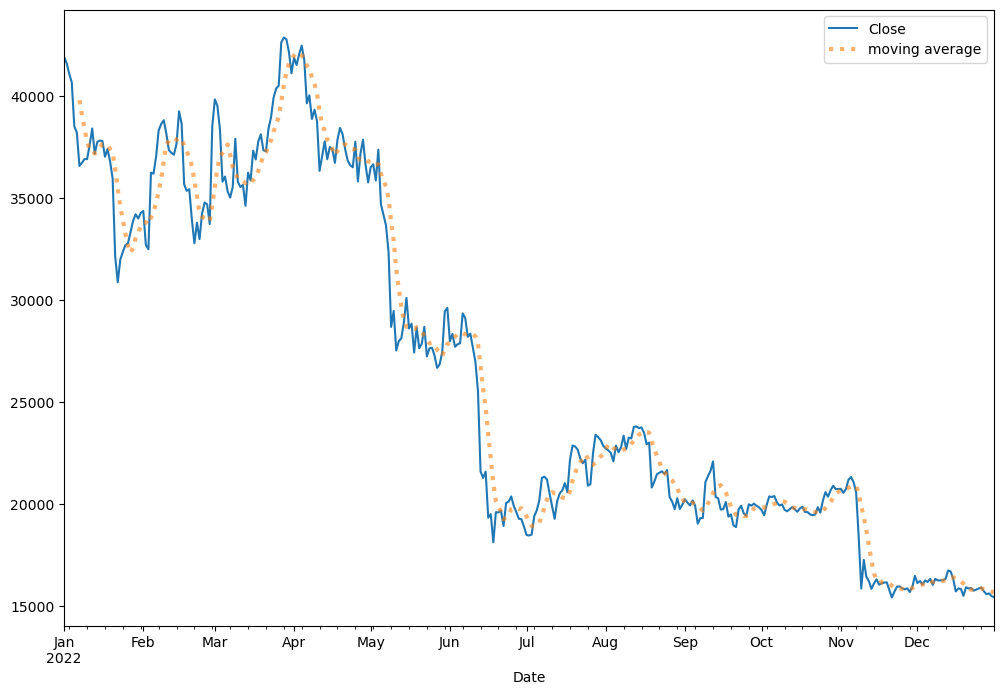

In [ ]:
plt.figure(figsize=(12,8))
bitcoin.loc['2022','Close'].plot()
bitcoin.loc['2022','Close'].rolling(window=7).mean().plot(label='moving average', lw=3, ls=':', alpha=0.6)
plt.legend()
plt.plot()

[]

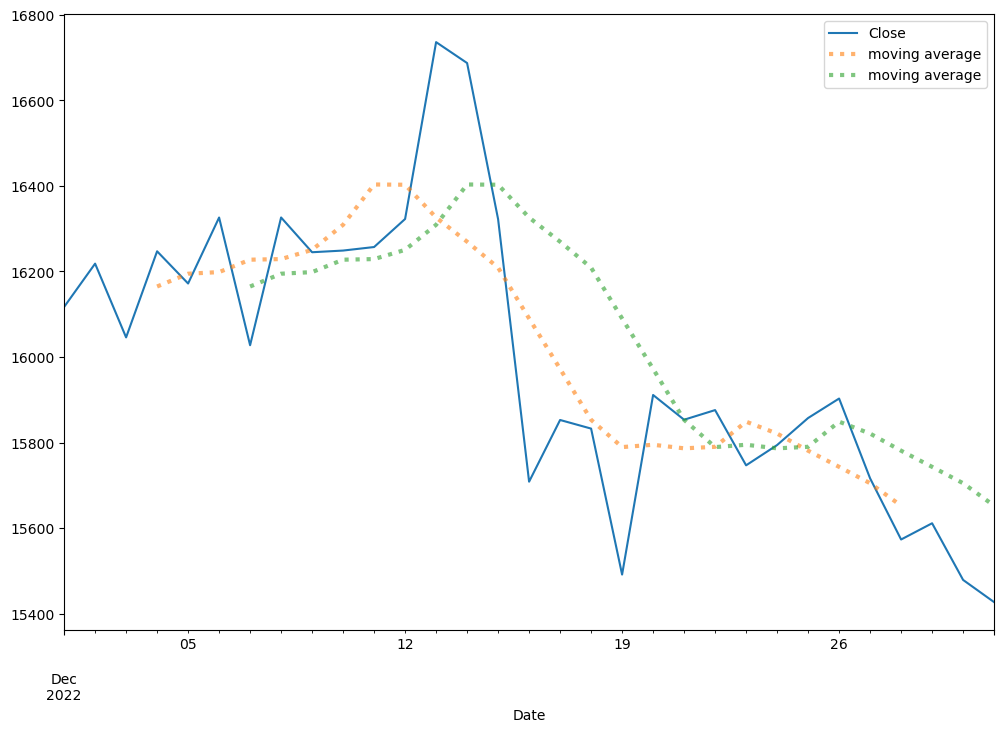

In [ ]:
plt.figure(figsize=(12,8))
bitcoin.loc['2022-12','Close'].plot()
bitcoin.loc['2022-12','Close'].rolling(window=7,center=True).mean().plot(label='moving average', lw=3, ls=':', alpha=0.6)
bitcoin.loc['2022-12','Close'].rolling(window=7).mean().plot(label='moving average', lw=3, ls=':', alpha=0.6)
plt.legend()
plt.plot()

[]

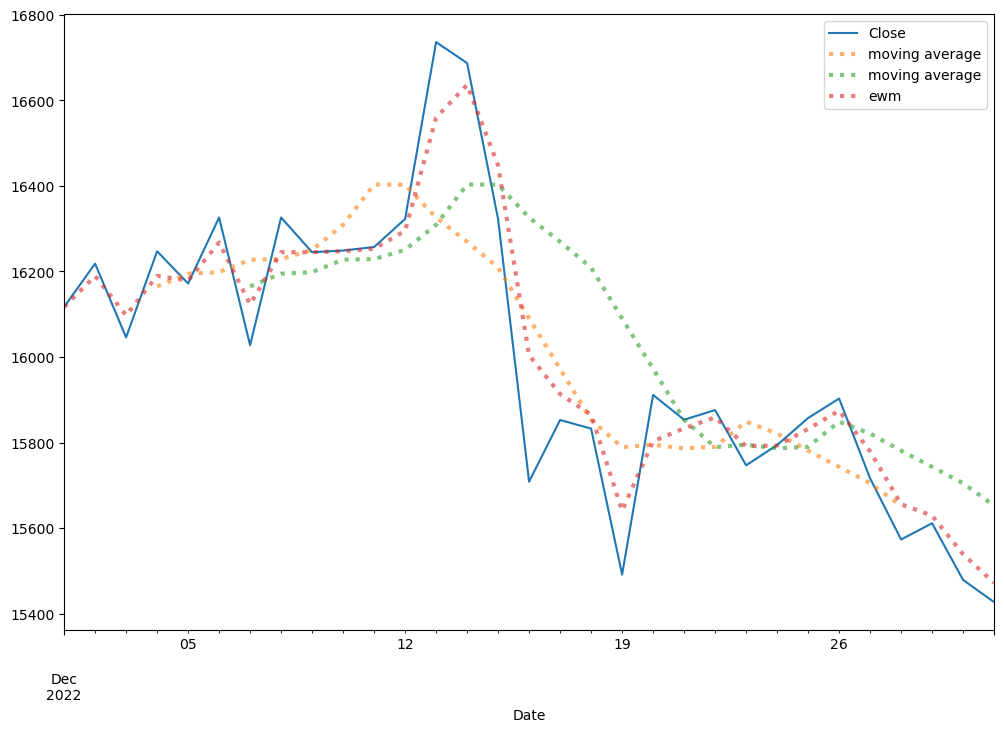

In [ ]:
plt.figure(figsize=(12,8))

bitcoin.loc['2022-12','Close'].plot()
bitcoin.loc['2022-12','Close'].rolling(window=7,center=True).mean().plot(label='moving average', lw=3, ls=':', alpha=0.6)
bitcoin.loc['2022-12','Close'].rolling(window=7).mean().plot(label='moving average', lw=3, ls=':', alpha=0.6)
bitcoin.loc['2022-12','Close'].ewm(alpha=0.6).mean().plot(label='ewm', lw=3, ls=':', alpha=0.6)


plt.legend()
plt.plot()

[]

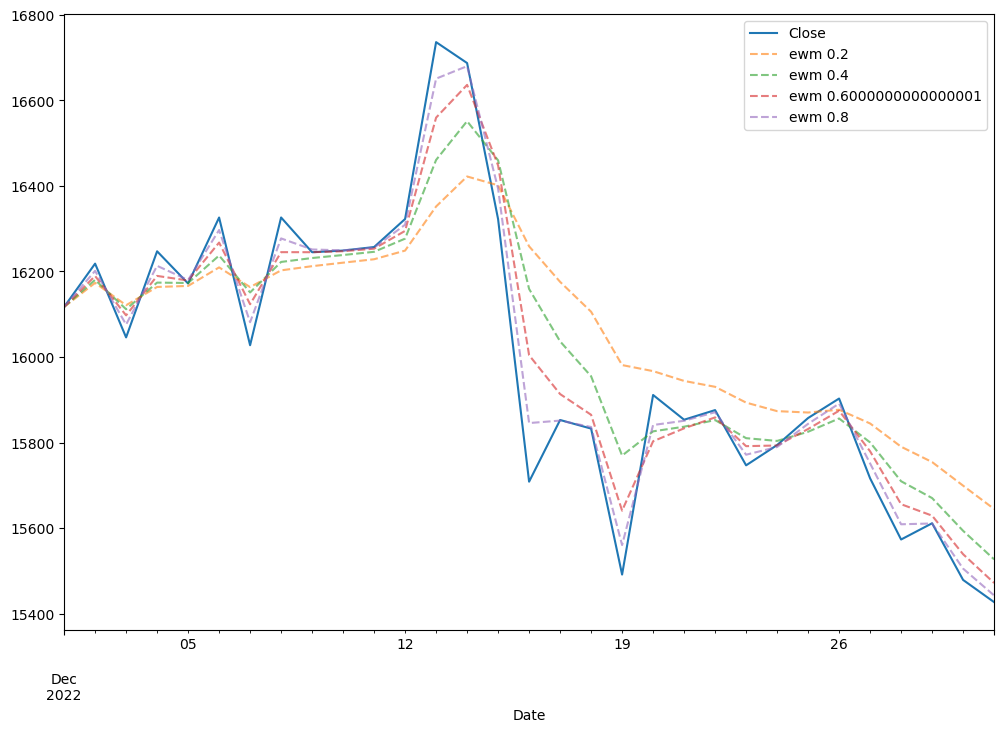

In [ ]:
plt.figure(figsize=(12,8))

bitcoin.loc['2022-12','Close'].plot()

for i in np.arange(0.2, 1, 0.2):
    bitcoin.loc['2022-12','Close'].ewm(alpha=i).mean().plot(label=f'ewm {i}', ls='--', alpha=0.6)

plt.legend()
plt.plot()


In [ ]:
ethereum

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-11,256.011322,273.902954,255.673492,269.811371,269.811371,722199256
2017-11-12,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530
2017-11-13,263.314758,281.949707,263.405121,271.556213,271.556213,893329318
2017-11-14,271.596497,290.873871,271.573212,286.394958,286.394958,907354313
2017-11-15,286.677399,289.079956,279.644714,282.937531,282.937531,613364441
...,...,...,...,...,...,...
2023-01-14,1338.153198,1441.432861,1337.747559,1430.078979,1430.078979,14243204001
2023-01-15,1430.101685,1435.837158,1402.584961,1434.459961,1434.459961,6259608305
2023-01-16,1434.496704,1473.543091,1412.936035,1455.784790,1455.784790,7805459948


In [ ]:
btc_eth = pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc', '_eth'))

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

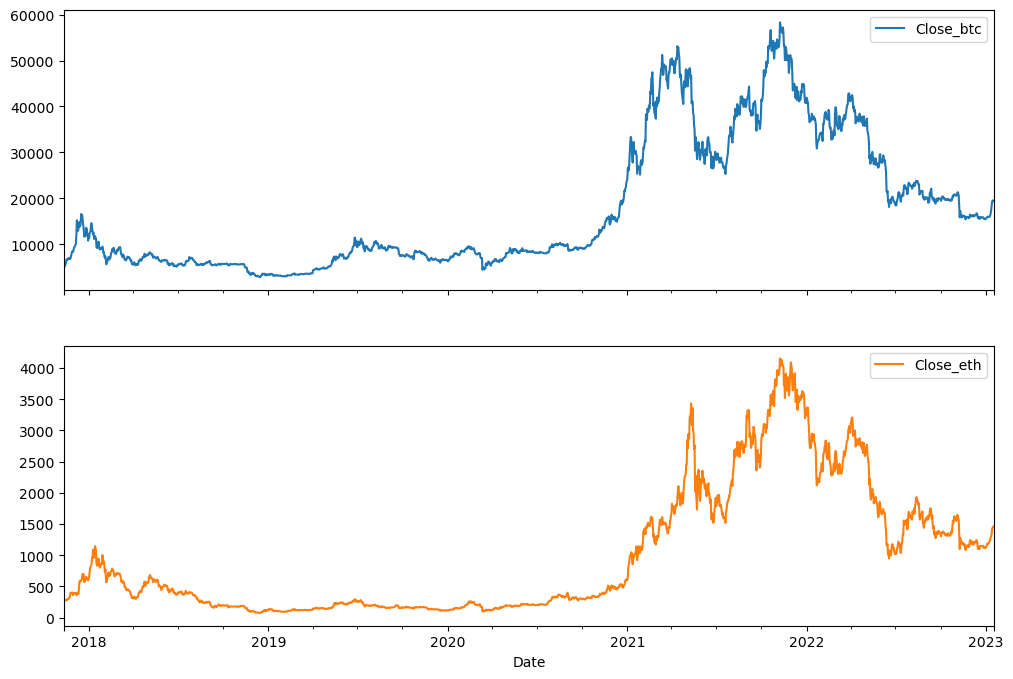

In [ ]:
btc_eth[['Close_btc','Close_eth']].plot(subplots=True, figsize=(12,8))

In [ ]:
correlations = btc_eth[['Close_btc','Close_eth']].corr()
correlations

,Close_btc,Close_eth
Close_btc,1.000000,0.927576
Close_eth,0.927576,1.000000


<AxesSubplot: >

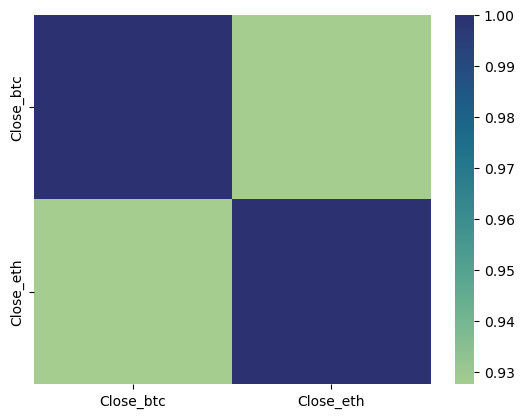

In [ ]:
import seaborn as sns
sns.heatmap(correlations,cmap='crest')

In [ ]:
data = bitcoin.copy()
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

In [ ]:
data['RollingMax'] = data['Close'].shift(1).rolling(window=28).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window=28).min()

data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1
data.loc[data['RollingMin'] > data['Close'], 'Sell'] = -1

In [ ]:
start = '2022'
end = '2022'

fig, ax = plt.subplots(2, figsize=(12,8), sharex=True)

ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].legend(['close','max','min'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['buy', 'sell'])